<a href="https://colab.research.google.com/github/OseiasBeu/SparkFormation/blob/main/SparkFormation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Configurando Ambiente

In [1]:
# Instalando o Java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [2]:
# Fazendo download
!wget -q https://archive.apache.org/dist/spark/spark-3.1.2/spark-3.1.2-bin-hadoop2.7.tgz

# Descompactando os arquivos
!tar xf spark-3.1.2-bin-hadoop2.7.tgz

In [3]:
# Importando a biblioteca os
import os

# Definindo a variável de ambiente do Java
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"

# Definindo a variável de ambiente do Spark
os.environ["SPARK_HOME"] = "/content/spark-3.1.2-bin-hadoop2.7"

In [4]:
# instalando a findspark
!pip install -q findspark

In [5]:
# Importando a findspark
import findspark

# Iniciando o findspark
findspark.init()

In [6]:
# importando o pacote necessário para iniciar uma seção Spark
from pyspark.sql import SparkSession

# iniciando o spark context
sc = SparkSession.builder.master('local[*]').config("spark.executor.memory", "2g").config('spark.driver.memory', '1g').config('spark.driver.cores', '4').enableHiveSupport().getOrCreate()
# ss = SparkSession.builder.master('local').getOrCreate()

# Verificando se a sessão foi criada
sc

In [7]:
# importando os métodos com funções para transformações de variáveis
from pyspark.sql.functions import *
from pyspark.sql import *

SQLContext(sparkContext=sc.sparkContext, sparkSession=sc)

In [8]:
sc.sparkContext

<SparkContext master=local[*] appName=pyspark-shell>

# RDD's

In [9]:
numeros = sc.sparkContext.parallelize([1,2,3,4,5,6,7,8,9,10])

In [10]:
numeros.take(5)

[1, 2, 3, 4, 5]

In [11]:
numeros.top(5)

[10, 9, 8, 7, 6]

In [12]:
numeros.collect()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

## Funções

In [13]:
numeros.count()

10

In [14]:
numeros.mean()

5.5

In [15]:
numeros.max()

10

In [16]:
numeros.min()

1

In [17]:
numeros.stdev()

2.8722813232690143

In [18]:
numeros.sum()

55

## Filtro

In [19]:
filtro = numeros.filter(lambda filtro: filtro > 2)

In [20]:
filtro.collect()

[3, 4, 5, 6, 7, 8, 9, 10]

In [21]:
amostra = numeros.sample(True, 0.5,1)

In [22]:
amostra.collect()

[2, 3, 4, 5, 8, 10, 10, 10, 10]

In [23]:
mapa = numeros.map(lambda mapa: mapa *2)

In [24]:
mapa.collect()

[2, 4, 6, 8, 10, 12, 14, 16, 18, 20]

In [25]:
numeros.collect()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

## Join's

In [26]:
numeros2 = sc.sparkContext.parallelize([6,7,8,9,10])

In [27]:
uniao = numeros.union(numeros2)

In [28]:
uniao.collect()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 6, 7, 8, 9, 10]

In [29]:
interseccao = numeros.intersection(numeros2)

In [30]:
interseccao.collect()

[8, 9, 6, 10, 7]

In [31]:
subtrai = numeros.subtract(numeros2)

In [32]:
subtrai.collect()

[4, 1, 5, 2, 3]

In [33]:
cartesiano = numeros.cartesian(numeros2)

In [34]:
cartesiano.collect()

[(1, 6),
 (1, 7),
 (2, 6),
 (2, 7),
 (3, 6),
 (3, 7),
 (4, 6),
 (4, 7),
 (5, 6),
 (5, 7),
 (1, 8),
 (1, 9),
 (2, 8),
 (2, 9),
 (3, 8),
 (3, 9),
 (4, 8),
 (4, 9),
 (5, 8),
 (5, 9),
 (1, 10),
 (2, 10),
 (3, 10),
 (4, 10),
 (5, 10),
 (6, 6),
 (6, 7),
 (7, 6),
 (7, 7),
 (8, 6),
 (8, 7),
 (9, 6),
 (9, 7),
 (10, 6),
 (10, 7),
 (6, 8),
 (6, 9),
 (7, 8),
 (7, 9),
 (8, 8),
 (8, 9),
 (9, 8),
 (9, 9),
 (10, 8),
 (10, 9),
 (6, 10),
 (7, 10),
 (8, 10),
 (9, 10),
 (10, 10)]

In [35]:
cartesiano.countByValue()

defaultdict(int,
            {(1, 6): 1,
             (1, 7): 1,
             (2, 6): 1,
             (2, 7): 1,
             (3, 6): 1,
             (3, 7): 1,
             (4, 6): 1,
             (4, 7): 1,
             (5, 6): 1,
             (5, 7): 1,
             (1, 8): 1,
             (1, 9): 1,
             (2, 8): 1,
             (2, 9): 1,
             (3, 8): 1,
             (3, 9): 1,
             (4, 8): 1,
             (4, 9): 1,
             (5, 8): 1,
             (5, 9): 1,
             (1, 10): 1,
             (2, 10): 1,
             (3, 10): 1,
             (4, 10): 1,
             (5, 10): 1,
             (6, 6): 1,
             (6, 7): 1,
             (7, 6): 1,
             (7, 7): 1,
             (8, 6): 1,
             (8, 7): 1,
             (9, 6): 1,
             (9, 7): 1,
             (10, 6): 1,
             (10, 7): 1,
             (6, 8): 1,
             (6, 9): 1,
             (7, 8): 1,
             (7, 9): 1,
             (8, 8): 1,
             (8,

## Compras

In [36]:
compras = sc.sparkContext.parallelize([(1,200),(2,300),(3,120),(4,250),(5,78)])

In [37]:
chaves = compras.keys()
chaves.collect()

[1, 2, 3, 4, 5]

In [38]:
valores = compras.values()
valores.collect()

[200, 300, 120, 250, 78]

In [39]:
compras.countByKey()

defaultdict(int, {1: 1, 2: 1, 3: 1, 4: 1, 5: 1})

In [40]:
soma = compras.mapValues(lambda soma: soma + 1)
soma.collect()

[(1, 201), (2, 301), (3, 121), (4, 251), (5, 79)]

In [41]:
compras.collect()

[(1, 200), (2, 300), (3, 120), (4, 250), (5, 78)]

In [42]:
debitos = sc.sparkContext.parallelize([(1,20),(2,300)])

In [43]:
resultado = compras.join(debitos)
resultado.collect()

[(1, (200, 20)), (2, (300, 300))]

In [44]:
semdebito = compras.subtractByKey(debitos)
semdebito.collect()

[(4, 250), (5, 78), (3, 120)]

## Dataframes

In [45]:
df1 = sc.createDataFrame([("Pedro",10),("Maria",20),("José",40)])

In [46]:
df1.show()

+-----+---+
|   _1| _2|
+-----+---+
|Pedro| 10|
|Maria| 20|
| José| 40|
+-----+---+



In [47]:
schema = "Id INT, Nome STRING"
dados =  [[1,"Pedro"],[2, "Maria"]]
df2 = sc.createDataFrame(dados, schema)

In [48]:
df2.show()

+---+-----+
| Id| Nome|
+---+-----+
|  1|Pedro|
|  2|Maria|
+---+-----+



In [49]:
from pyspark.sql.functions import sum

In [50]:
schema2 = "Produtos STRING, Vendas INT"
vendas = [["Caneta",10],["Lápis",20],["Caneta",40]]

In [51]:
df3 = sc.createDataFrame(vendas,schema2)
df3.show()

+--------+------+
|Produtos|Vendas|
+--------+------+
|  Caneta|    10|
|   Lápis|    20|
|  Caneta|    40|
+--------+------+



In [52]:
agrupado = df3.groupBy('Produtos').agg(sum("Vendas"))
agrupado.show()

+--------+-----------+
|Produtos|sum(Vendas)|
+--------+-----------+
|  Caneta|         50|
|   Lápis|         20|
+--------+-----------+



In [53]:
df3.groupBy('Produtos').agg(sum("Vendas")).show()

+--------+-----------+
|Produtos|sum(Vendas)|
+--------+-----------+
|  Caneta|         50|
|   Lápis|         20|
+--------+-----------+



In [54]:
df3.select('Produtos').show()

+--------+
|Produtos|
+--------+
|  Caneta|
|   Lápis|
|  Caneta|
+--------+



In [55]:
df3.select('Produtos','Vendas').show()

+--------+------+
|Produtos|Vendas|
+--------+------+
|  Caneta|    10|
|   Lápis|    20|
|  Caneta|    40|
+--------+------+



In [56]:
from pyspark.sql.functions import expr

In [57]:
df3.select('Produtos','Vendas',expr('Vendas * 0.2')).show()

+--------+------+--------------+
|Produtos|Vendas|(Vendas * 0.2)|
+--------+------+--------------+
|  Caneta|    10|           2.0|
|   Lápis|    20|           4.0|
|  Caneta|    40|           8.0|
+--------+------+--------------+



In [58]:
df3.columns

['Produtos', 'Vendas']

In [59]:
from pyspark.sql.types import *

In [60]:
arqschmema = "id INT, nome STRING, status STRING, cidade STRING, vendas INT, data STRING"

In [61]:
!wget 'https://raw.githubusercontent.com/OseiasBeu/SparkFormation/main/databases/despachantes.csv'

--2023-04-06 18:29:55--  https://raw.githubusercontent.com/OseiasBeu/SparkFormation/main/databases/despachantes.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 529 [text/plain]
Saving to: ‘despachantes.csv’

despachantes.csv    100%[===================>]     529  --.-KB/s    in 0s      

2023-04-06 18:29:56 (24.3 MB/s) - ‘despachantes.csv’ saved [529/529]



In [62]:
despachantes = sc.read.csv('/content/despachantes.csv',header=False, schema = arqschmema)

In [63]:
despachantes.show()

+---+-------------------+------+-------------+------+----------+
| id|               nome|status|       cidade|vendas|      data|
+---+-------------------+------+-------------+------+----------+
|  1|   Carminda Pestana| Ativo|  Santa Maria|    23|2020-08-11|
|  2|    Deolinda Vilela| Ativo|Novo Hamburgo|    34|2020-03-05|
|  3|   Emídio Dornelles| Ativo| Porto Alegre|    34|2020-02-05|
|  4|Felisbela Dornelles| Ativo| Porto Alegre|    36|2020-02-05|
|  5|     Graça Ornellas| Ativo| Porto Alegre|    12|2020-02-05|
|  6|   Matilde Rebouças| Ativo| Porto Alegre|    22|2019-01-05|
|  7|    Noêmia   Orriça| Ativo|  Santa Maria|    45|2019-10-05|
|  8|      Roque Vásquez| Ativo| Porto Alegre|    65|2020-03-05|
|  9|      Uriel Queiroz| Ativo| Porto Alegre|    54|2018-05-05|
| 10|   Viviana Sequeira| Ativo| Porto Alegre|     0|2020-09-05|
+---+-------------------+------+-------------+------+----------+



In [64]:
desp_autoschema = sc.read.load('/content/despachantes.csv', header=False, format='csv',sep=',', inferSchema=True)

In [65]:
desp_autoschema.show()

+---+-------------------+-----+-------------+---+----------+
|_c0|                _c1|  _c2|          _c3|_c4|       _c5|
+---+-------------------+-----+-------------+---+----------+
|  1|   Carminda Pestana|Ativo|  Santa Maria| 23|2020-08-11|
|  2|    Deolinda Vilela|Ativo|Novo Hamburgo| 34|2020-03-05|
|  3|   Emídio Dornelles|Ativo| Porto Alegre| 34|2020-02-05|
|  4|Felisbela Dornelles|Ativo| Porto Alegre| 36|2020-02-05|
|  5|     Graça Ornellas|Ativo| Porto Alegre| 12|2020-02-05|
|  6|   Matilde Rebouças|Ativo| Porto Alegre| 22|2019-01-05|
|  7|    Noêmia   Orriça|Ativo|  Santa Maria| 45|2019-10-05|
|  8|      Roque Vásquez|Ativo| Porto Alegre| 65|2020-03-05|
|  9|      Uriel Queiroz|Ativo| Porto Alegre| 54|2018-05-05|
| 10|   Viviana Sequeira|Ativo| Porto Alegre|  0|2020-09-05|
+---+-------------------+-----+-------------+---+----------+



In [66]:
despachantes.schema

StructType(List(StructField(id,IntegerType,true),StructField(nome,StringType,true),StructField(status,StringType,true),StructField(cidade,StringType,true),StructField(vendas,IntegerType,true),StructField(data,StringType,true)))

In [67]:
desp_autoschema.schema

StructType(List(StructField(_c0,IntegerType,true),StructField(_c1,StringType,true),StructField(_c2,StringType,true),StructField(_c3,StringType,true),StructField(_c4,IntegerType,true),StructField(_c5,StringType,true)))

In [68]:
from pyspark.sql import functions as Func

In [69]:
despachantes.select('id','nome','vendas').where(Func.col('vendas') > 20).show()

+---+-------------------+------+
| id|               nome|vendas|
+---+-------------------+------+
|  1|   Carminda Pestana|    23|
|  2|    Deolinda Vilela|    34|
|  3|   Emídio Dornelles|    34|
|  4|Felisbela Dornelles|    36|
|  6|   Matilde Rebouças|    22|
|  7|    Noêmia   Orriça|    45|
|  8|      Roque Vásquez|    65|
|  9|      Uriel Queiroz|    54|
+---+-------------------+------+



In [70]:
despachantes.select('id','nome','vendas').where((Func.col('vendas') > 20) & (Func.col('vendas')<40)).show()

+---+-------------------+------+
| id|               nome|vendas|
+---+-------------------+------+
|  1|   Carminda Pestana|    23|
|  2|    Deolinda Vilela|    34|
|  3|   Emídio Dornelles|    34|
|  4|Felisbela Dornelles|    36|
|  6|   Matilde Rebouças|    22|
+---+-------------------+------+



In [71]:
novodf = despachantes.withColumnRenamed('nome','nomes')

In [72]:
novodf.columns

['id', 'nomes', 'status', 'cidade', 'vendas', 'data']

In [73]:
from pyspark.sql.functions import *

In [74]:
despachantes2 = despachantes.withColumn('data2', to_timestamp(Func.col('data'),'yyyy-MM-dd'))

In [75]:
despachantes2.schema

StructType(List(StructField(id,IntegerType,true),StructField(nome,StringType,true),StructField(status,StringType,true),StructField(cidade,StringType,true),StructField(vendas,IntegerType,true),StructField(data,StringType,true),StructField(data2,TimestampType,true)))

In [76]:
despachantes2.select(year('data')).show()

+----------+
|year(data)|
+----------+
|      2020|
|      2020|
|      2020|
|      2020|
|      2020|
|      2019|
|      2019|
|      2020|
|      2018|
|      2020|
+----------+



In [77]:
despachantes2.select(year('data')).distinct().show()

+----------+
|year(data)|
+----------+
|      2018|
|      2019|
|      2020|
+----------+



In [78]:
despachantes2.select("nome", year('data')).orderBy('nome').show()

+-------------------+----------+
|               nome|year(data)|
+-------------------+----------+
|   Carminda Pestana|      2020|
|    Deolinda Vilela|      2020|
|   Emídio Dornelles|      2020|
|Felisbela Dornelles|      2020|
|     Graça Ornellas|      2020|
|   Matilde Rebouças|      2019|
|    Noêmia   Orriça|      2019|
|      Roque Vásquez|      2020|
|      Uriel Queiroz|      2018|
|   Viviana Sequeira|      2020|
+-------------------+----------+



In [79]:
despachantes2.select('data').groupBy(year('data')).count().show()

+----------+-----+
|year(data)|count|
+----------+-----+
|      2018|    1|
|      2019|    2|
|      2020|    7|
+----------+-----+



## Principais ações de transformações

In [80]:
despachantes2.select(Func.sum('vendas')).show()

+-----------+
|sum(vendas)|
+-----------+
|        325|
+-----------+



In [81]:
despachantes.show()

+---+-------------------+------+-------------+------+----------+
| id|               nome|status|       cidade|vendas|      data|
+---+-------------------+------+-------------+------+----------+
|  1|   Carminda Pestana| Ativo|  Santa Maria|    23|2020-08-11|
|  2|    Deolinda Vilela| Ativo|Novo Hamburgo|    34|2020-03-05|
|  3|   Emídio Dornelles| Ativo| Porto Alegre|    34|2020-02-05|
|  4|Felisbela Dornelles| Ativo| Porto Alegre|    36|2020-02-05|
|  5|     Graça Ornellas| Ativo| Porto Alegre|    12|2020-02-05|
|  6|   Matilde Rebouças| Ativo| Porto Alegre|    22|2019-01-05|
|  7|    Noêmia   Orriça| Ativo|  Santa Maria|    45|2019-10-05|
|  8|      Roque Vásquez| Ativo| Porto Alegre|    65|2020-03-05|
|  9|      Uriel Queiroz| Ativo| Porto Alegre|    54|2018-05-05|
| 10|   Viviana Sequeira| Ativo| Porto Alegre|     0|2020-09-05|
+---+-------------------+------+-------------+------+----------+



In [82]:
despachantes.take(1)

[Row(id=1, nome='Carminda Pestana', status='Ativo', cidade='Santa Maria', vendas=23, data='2020-08-11')]

In [83]:
despachantes.collect()

[Row(id=1, nome='Carminda Pestana', status='Ativo', cidade='Santa Maria', vendas=23, data='2020-08-11'),
 Row(id=2, nome='Deolinda Vilela', status='Ativo', cidade='Novo Hamburgo', vendas=34, data='2020-03-05'),
 Row(id=3, nome='Emídio Dornelles', status='Ativo', cidade='Porto Alegre', vendas=34, data='2020-02-05'),
 Row(id=4, nome='Felisbela Dornelles', status='Ativo', cidade='Porto Alegre', vendas=36, data='2020-02-05'),
 Row(id=5, nome='Graça Ornellas', status='Ativo', cidade='Porto Alegre', vendas=12, data='2020-02-05'),
 Row(id=6, nome='Matilde Rebouças', status='Ativo', cidade='Porto Alegre', vendas=22, data='2019-01-05'),
 Row(id=7, nome='Noêmia   Orriça', status='Ativo', cidade='Santa Maria', vendas=45, data='2019-10-05'),
 Row(id=8, nome='Roque Vásquez', status='Ativo', cidade='Porto Alegre', vendas=65, data='2020-03-05'),
 Row(id=9, nome='Uriel Queiroz', status='Ativo', cidade='Porto Alegre', vendas=54, data='2018-05-05'),
 Row(id=10, nome='Viviana Sequeira', status='Ativo', c

In [84]:
despachantes.count()

10

In [85]:
despachantes.show()

+---+-------------------+------+-------------+------+----------+
| id|               nome|status|       cidade|vendas|      data|
+---+-------------------+------+-------------+------+----------+
|  1|   Carminda Pestana| Ativo|  Santa Maria|    23|2020-08-11|
|  2|    Deolinda Vilela| Ativo|Novo Hamburgo|    34|2020-03-05|
|  3|   Emídio Dornelles| Ativo| Porto Alegre|    34|2020-02-05|
|  4|Felisbela Dornelles| Ativo| Porto Alegre|    36|2020-02-05|
|  5|     Graça Ornellas| Ativo| Porto Alegre|    12|2020-02-05|
|  6|   Matilde Rebouças| Ativo| Porto Alegre|    22|2019-01-05|
|  7|    Noêmia   Orriça| Ativo|  Santa Maria|    45|2019-10-05|
|  8|      Roque Vásquez| Ativo| Porto Alegre|    65|2020-03-05|
|  9|      Uriel Queiroz| Ativo| Porto Alegre|    54|2018-05-05|
| 10|   Viviana Sequeira| Ativo| Porto Alegre|     0|2020-09-05|
+---+-------------------+------+-------------+------+----------+



In [86]:
despachantes.orderBy("vendas").show()

+---+-------------------+------+-------------+------+----------+
| id|               nome|status|       cidade|vendas|      data|
+---+-------------------+------+-------------+------+----------+
| 10|   Viviana Sequeira| Ativo| Porto Alegre|     0|2020-09-05|
|  5|     Graça Ornellas| Ativo| Porto Alegre|    12|2020-02-05|
|  6|   Matilde Rebouças| Ativo| Porto Alegre|    22|2019-01-05|
|  1|   Carminda Pestana| Ativo|  Santa Maria|    23|2020-08-11|
|  2|    Deolinda Vilela| Ativo|Novo Hamburgo|    34|2020-03-05|
|  3|   Emídio Dornelles| Ativo| Porto Alegre|    34|2020-02-05|
|  4|Felisbela Dornelles| Ativo| Porto Alegre|    36|2020-02-05|
|  7|    Noêmia   Orriça| Ativo|  Santa Maria|    45|2019-10-05|
|  9|      Uriel Queiroz| Ativo| Porto Alegre|    54|2018-05-05|
|  8|      Roque Vásquez| Ativo| Porto Alegre|    65|2020-03-05|
+---+-------------------+------+-------------+------+----------+



In [87]:
despachantes.orderBy(Func.col("vendas").desc()).show()

+---+-------------------+------+-------------+------+----------+
| id|               nome|status|       cidade|vendas|      data|
+---+-------------------+------+-------------+------+----------+
|  8|      Roque Vásquez| Ativo| Porto Alegre|    65|2020-03-05|
|  9|      Uriel Queiroz| Ativo| Porto Alegre|    54|2018-05-05|
|  7|    Noêmia   Orriça| Ativo|  Santa Maria|    45|2019-10-05|
|  4|Felisbela Dornelles| Ativo| Porto Alegre|    36|2020-02-05|
|  2|    Deolinda Vilela| Ativo|Novo Hamburgo|    34|2020-03-05|
|  3|   Emídio Dornelles| Ativo| Porto Alegre|    34|2020-02-05|
|  1|   Carminda Pestana| Ativo|  Santa Maria|    23|2020-08-11|
|  6|   Matilde Rebouças| Ativo| Porto Alegre|    22|2019-01-05|
|  5|     Graça Ornellas| Ativo| Porto Alegre|    12|2020-02-05|
| 10|   Viviana Sequeira| Ativo| Porto Alegre|     0|2020-09-05|
+---+-------------------+------+-------------+------+----------+



In [88]:
despachantes.orderBy(Func.col("cidade").desc(),Func.col('vendas').desc()).show()

+---+-------------------+------+-------------+------+----------+
| id|               nome|status|       cidade|vendas|      data|
+---+-------------------+------+-------------+------+----------+
|  7|    Noêmia   Orriça| Ativo|  Santa Maria|    45|2019-10-05|
|  1|   Carminda Pestana| Ativo|  Santa Maria|    23|2020-08-11|
|  8|      Roque Vásquez| Ativo| Porto Alegre|    65|2020-03-05|
|  9|      Uriel Queiroz| Ativo| Porto Alegre|    54|2018-05-05|
|  4|Felisbela Dornelles| Ativo| Porto Alegre|    36|2020-02-05|
|  3|   Emídio Dornelles| Ativo| Porto Alegre|    34|2020-02-05|
|  6|   Matilde Rebouças| Ativo| Porto Alegre|    22|2019-01-05|
|  5|     Graça Ornellas| Ativo| Porto Alegre|    12|2020-02-05|
| 10|   Viviana Sequeira| Ativo| Porto Alegre|     0|2020-09-05|
|  2|    Deolinda Vilela| Ativo|Novo Hamburgo|    34|2020-03-05|
+---+-------------------+------+-------------+------+----------+



In [89]:
despachantes.groupBy("cidade").agg(sum("vendas")).show()

+-------------+-----------+
|       cidade|sum(vendas)|
+-------------+-----------+
|  Santa Maria|         68|
|Novo Hamburgo|         34|
| Porto Alegre|        223|
+-------------+-----------+



In [90]:
despachantes.groupBy("cidade").agg(sum("vendas")).orderBy(Func.col("sum(vendas)").desc()).show()

+-------------+-----------+
|       cidade|sum(vendas)|
+-------------+-----------+
| Porto Alegre|        223|
|  Santa Maria|         68|
|Novo Hamburgo|         34|
+-------------+-----------+



In [91]:
despachantes.groupBy("cidade").agg(sum("vendas")).filter(Func.col('sum(vendas)') > 68).show()

+------------+-----------+
|      cidade|sum(vendas)|
+------------+-----------+
|Porto Alegre|        223|
+------------+-----------+



In [92]:
despachantes.filter(Func.col('nome') == 'Deolinda Vilela').show()

+---+---------------+------+-------------+------+----------+
| id|           nome|status|       cidade|vendas|      data|
+---+---------------+------+-------------+------+----------+
|  2|Deolinda Vilela| Ativo|Novo Hamburgo|    34|2020-03-05|
+---+---------------+------+-------------+------+----------+



## Exportando dados

In [93]:
despachantes.write.format('parquet').save('/content/dfimportparquet')
despachantes.write.format('csv').save('/content/dfimportcsv')
despachantes.write.format('json').save('/content/dfimportjson')
despachantes.write.format('orc').save('/content/dfimportorc')

## Importando Dados

In [94]:
par = sc.read.format('parquet').load('/content/dfimportparquet/*.parquet')
csv = sc.read.format('csv').load('/content/dfimportcsv/*.csv')
js = sc.read.format('json').load('/content/dfimportjson/*.json')
orc = sc.read.format('orc').load('/content/dfimportorc/*.orc')

In [95]:
par.show()

+---+-------------------+------+-------------+------+----------+
| id|               nome|status|       cidade|vendas|      data|
+---+-------------------+------+-------------+------+----------+
|  1|   Carminda Pestana| Ativo|  Santa Maria|    23|2020-08-11|
|  2|    Deolinda Vilela| Ativo|Novo Hamburgo|    34|2020-03-05|
|  3|   Emídio Dornelles| Ativo| Porto Alegre|    34|2020-02-05|
|  4|Felisbela Dornelles| Ativo| Porto Alegre|    36|2020-02-05|
|  5|     Graça Ornellas| Ativo| Porto Alegre|    12|2020-02-05|
|  6|   Matilde Rebouças| Ativo| Porto Alegre|    22|2019-01-05|
|  7|    Noêmia   Orriça| Ativo|  Santa Maria|    45|2019-10-05|
|  8|      Roque Vásquez| Ativo| Porto Alegre|    65|2020-03-05|
|  9|      Uriel Queiroz| Ativo| Porto Alegre|    54|2018-05-05|
| 10|   Viviana Sequeira| Ativo| Porto Alegre|     0|2020-09-05|
+---+-------------------+------+-------------+------+----------+



In [96]:
par.schema

StructType(List(StructField(id,IntegerType,true),StructField(nome,StringType,true),StructField(status,StringType,true),StructField(cidade,StringType,true),StructField(vendas,IntegerType,true),StructField(data,StringType,true)))

In [97]:
js.show()

+-------------+----------+---+-------------------+------+------+
|       cidade|      data| id|               nome|status|vendas|
+-------------+----------+---+-------------------+------+------+
|  Santa Maria|2020-08-11|  1|   Carminda Pestana| Ativo|    23|
|Novo Hamburgo|2020-03-05|  2|    Deolinda Vilela| Ativo|    34|
| Porto Alegre|2020-02-05|  3|   Emídio Dornelles| Ativo|    34|
| Porto Alegre|2020-02-05|  4|Felisbela Dornelles| Ativo|    36|
| Porto Alegre|2020-02-05|  5|     Graça Ornellas| Ativo|    12|
| Porto Alegre|2019-01-05|  6|   Matilde Rebouças| Ativo|    22|
|  Santa Maria|2019-10-05|  7|    Noêmia   Orriça| Ativo|    45|
| Porto Alegre|2020-03-05|  8|      Roque Vásquez| Ativo|    65|
| Porto Alegre|2018-05-05|  9|      Uriel Queiroz| Ativo|    54|
| Porto Alegre|2020-09-05| 10|   Viviana Sequeira| Ativo|     0|
+-------------+----------+---+-------------------+------+------+



In [98]:
js.schema

StructType(List(StructField(cidade,StringType,true),StructField(data,StringType,true),StructField(id,LongType,true),StructField(nome,StringType,true),StructField(status,StringType,true),StructField(vendas,LongType,true)))

In [99]:
orc.show()

+---+-------------------+------+-------------+------+----------+
| id|               nome|status|       cidade|vendas|      data|
+---+-------------------+------+-------------+------+----------+
|  1|   Carminda Pestana| Ativo|  Santa Maria|    23|2020-08-11|
|  2|    Deolinda Vilela| Ativo|Novo Hamburgo|    34|2020-03-05|
|  3|   Emídio Dornelles| Ativo| Porto Alegre|    34|2020-02-05|
|  4|Felisbela Dornelles| Ativo| Porto Alegre|    36|2020-02-05|
|  5|     Graça Ornellas| Ativo| Porto Alegre|    12|2020-02-05|
|  6|   Matilde Rebouças| Ativo| Porto Alegre|    22|2019-01-05|
|  7|    Noêmia   Orriça| Ativo|  Santa Maria|    45|2019-10-05|
|  8|      Roque Vásquez| Ativo| Porto Alegre|    65|2020-03-05|
|  9|      Uriel Queiroz| Ativo| Porto Alegre|    54|2018-05-05|
| 10|   Viviana Sequeira| Ativo| Porto Alegre|     0|2020-09-05|
+---+-------------------+------+-------------+------+----------+



In [100]:
orc.schema

StructType(List(StructField(id,IntegerType,true),StructField(nome,StringType,true),StructField(status,StringType,true),StructField(cidade,StringType,true),StructField(vendas,IntegerType,true),StructField(data,StringType,true)))

In [101]:
csv.show()

+---+-------------------+-----+-------------+---+----------+
|_c0|                _c1|  _c2|          _c3|_c4|       _c5|
+---+-------------------+-----+-------------+---+----------+
|  1|   Carminda Pestana|Ativo|  Santa Maria| 23|2020-08-11|
|  2|    Deolinda Vilela|Ativo|Novo Hamburgo| 34|2020-03-05|
|  3|   Emídio Dornelles|Ativo| Porto Alegre| 34|2020-02-05|
|  4|Felisbela Dornelles|Ativo| Porto Alegre| 36|2020-02-05|
|  5|     Graça Ornellas|Ativo| Porto Alegre| 12|2020-02-05|
|  6|   Matilde Rebouças|Ativo| Porto Alegre| 22|2019-01-05|
|  7|    Noêmia   Orriça|Ativo|  Santa Maria| 45|2019-10-05|
|  8|      Roque Vásquez|Ativo| Porto Alegre| 65|2020-03-05|
|  9|      Uriel Queiroz|Ativo| Porto Alegre| 54|2018-05-05|
| 10|   Viviana Sequeira|Ativo| Porto Alegre|  0|2020-09-05|
+---+-------------------+-----+-------------+---+----------+



In [102]:
csv.schema

StructType(List(StructField(_c0,StringType,true),StructField(_c1,StringType,true),StructField(_c2,StringType,true),StructField(_c3,StringType,true),StructField(_c4,StringType,true),StructField(_c5,StringType,true)))

In [103]:
arqschmema

'id INT, nome STRING, status STRING, cidade STRING, vendas INT, data STRING'

In [104]:
csv2 = sc.read.format('csv').load('/content/dfimportcsv/*.csv',schema=arqschmema)

In [105]:
csv2.show()

+---+-------------------+------+-------------+------+----------+
| id|               nome|status|       cidade|vendas|      data|
+---+-------------------+------+-------------+------+----------+
|  1|   Carminda Pestana| Ativo|  Santa Maria|    23|2020-08-11|
|  2|    Deolinda Vilela| Ativo|Novo Hamburgo|    34|2020-03-05|
|  3|   Emídio Dornelles| Ativo| Porto Alegre|    34|2020-02-05|
|  4|Felisbela Dornelles| Ativo| Porto Alegre|    36|2020-02-05|
|  5|     Graça Ornellas| Ativo| Porto Alegre|    12|2020-02-05|
|  6|   Matilde Rebouças| Ativo| Porto Alegre|    22|2019-01-05|
|  7|    Noêmia   Orriça| Ativo|  Santa Maria|    45|2019-10-05|
|  8|      Roque Vásquez| Ativo| Porto Alegre|    65|2020-03-05|
|  9|      Uriel Queiroz| Ativo| Porto Alegre|    54|2018-05-05|
| 10|   Viviana Sequeira| Ativo| Porto Alegre|     0|2020-09-05|
+---+-------------------+------+-------------+------+----------+



## Faça Você mesmo:

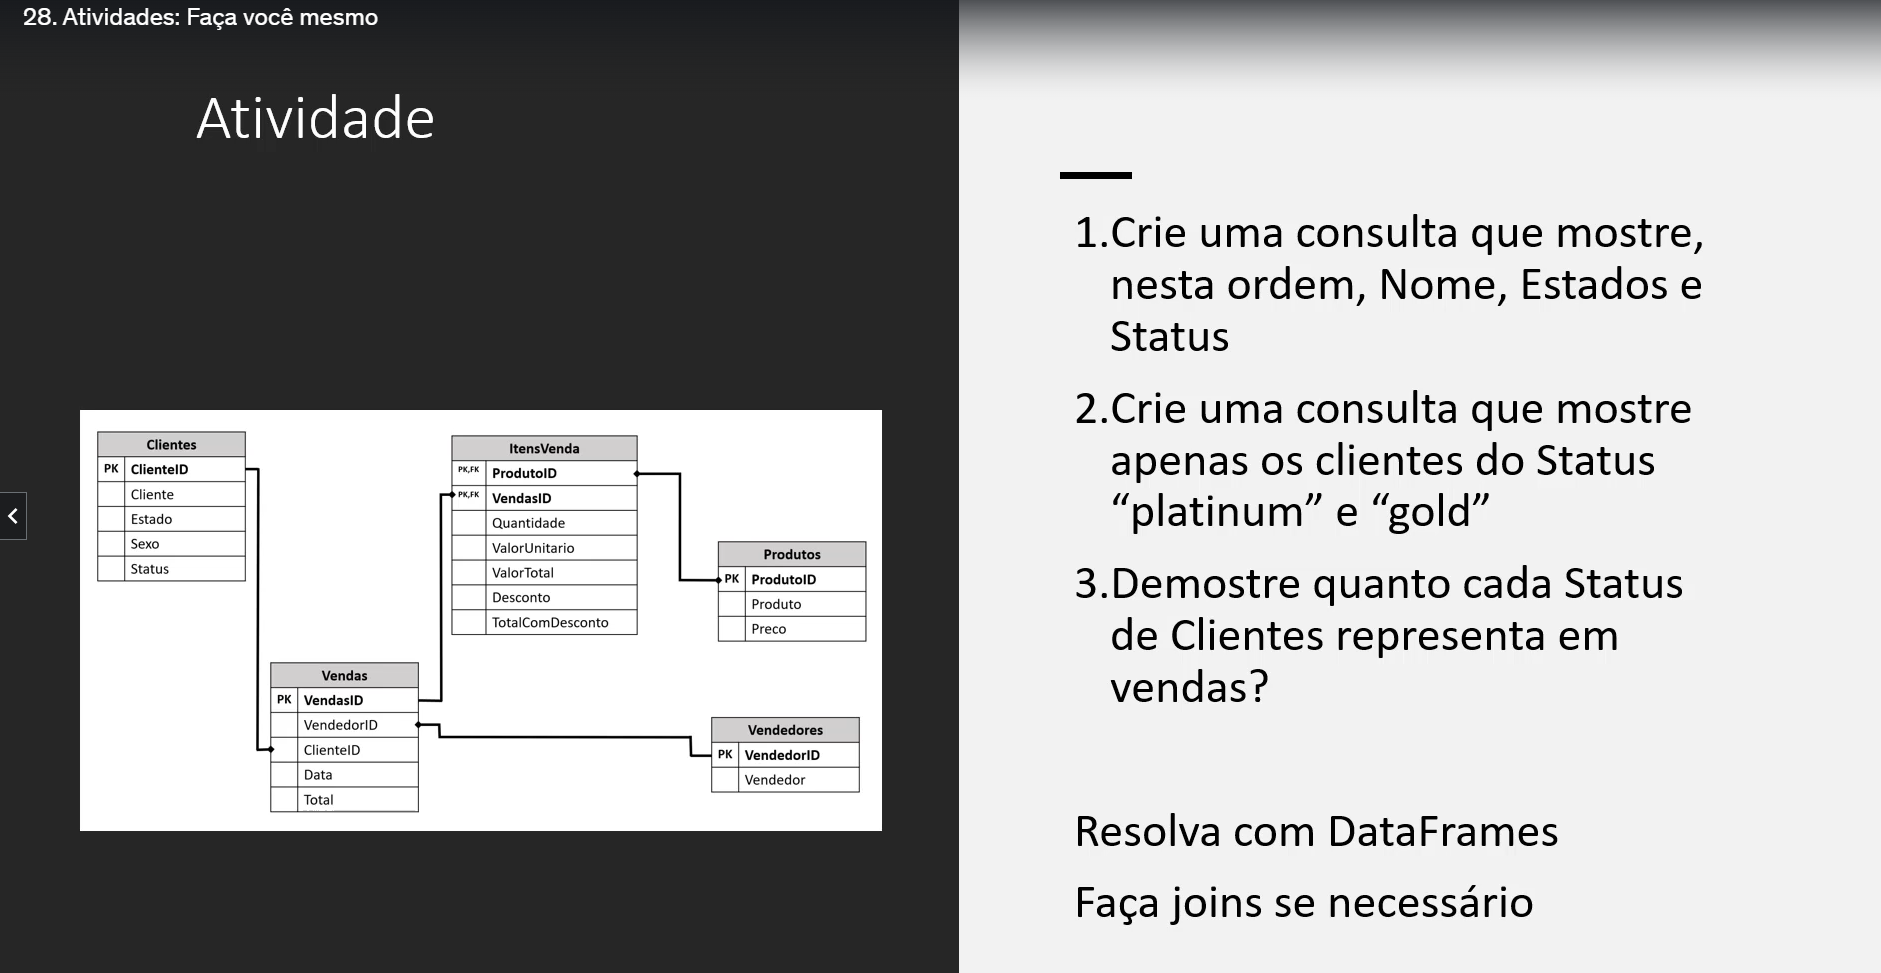

In [106]:
!wget 'https://github.com/OseiasBeu/SparkFormation/raw/main/databases/Atividades/Vendas.parquet'
!wget 'https://github.com/OseiasBeu/SparkFormation/blob/main/databases/Atividades/Clientes.parquet?raw=true'

--2023-04-06 18:30:12--  https://github.com/OseiasBeu/SparkFormation/raw/main/databases/Atividades/Vendas.parquet
Resolving github.com (github.com)... 20.27.177.113
Connecting to github.com (github.com)|20.27.177.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/OseiasBeu/SparkFormation/main/databases/Atividades/Vendas.parquet [following]
--2023-04-06 18:30:13--  https://raw.githubusercontent.com/OseiasBeu/SparkFormation/main/databases/Atividades/Vendas.parquet
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11882 (12K) [application/octet-stream]
Saving to: ‘Vendas.parquet’

Vendas.parquet      100%[===================>]  11.60K  --.-KB/s    in 0s      

2023-04-06 18:30:13 (35.9 MB/s) - ‘Ven

In [107]:
clientes = sc.read.format('parquet').load('/content/Clientes.parquet?raw=true')
vendas = sc.read.format('parquet').load('/content/Vendas.parquet')

In [108]:
clientes.show(5)

+---------+--------------------+------+------+--------+
|ClienteID|             Cliente|Estado|Genero|  Status|
+---------+--------------------+------+------+--------+
|        1|Adelina Buenaventura|    RJ|     M|  Silver|
|        2|        Adelino Gago|    RJ|     M|  Silver|
|        3|     Adolfo Patrício|    PE|     M|  Silver|
|        4|    Adriana Guedelha|    RO|     F|Platinum|
|        5|       Adélio Lisboa|    SE|     M|  Silver|
+---------+--------------------+------+------+--------+
only showing top 5 rows



In [109]:
clientes.select('Cliente','Estado', 'Status').show()

+--------------------+------+--------+
|             Cliente|Estado|  Status|
+--------------------+------+--------+
|Adelina Buenaventura|    RJ|  Silver|
|        Adelino Gago|    RJ|  Silver|
|     Adolfo Patrício|    PE|  Silver|
|    Adriana Guedelha|    RO|Platinum|
|       Adélio Lisboa|    SE|  Silver|
|       Adérito Bahía|    MA|  Silver|
|       Aida Dorneles|    RN|  Silver|
|   Alarico Quinterno|    AC|  Silver|
|    Alberto Cezimbra|    AM|  Silver|
|    Alberto Monsanto|    RN|    Gold|
|       Albino Canela|    AC|  Silver|
|     Alceste Varanda|    RR|  Silver|
|  Alcides Carvalhais|    RO|  Silver|
|        Aldo Martins|    GO|  Silver|
|   Alexandra Tabares|    MG|  Silver|
|      Alfredo Cotrim|    SC|  Silver|
|     Almeno Figueira|    SC|  Silver|
|      Alvito Peralta|    AM|  Silver|
|     Amadeu Martinho|    RN|  Silver|
|      Amélia Estévez|    PE|  Silver|
+--------------------+------+--------+
only showing top 20 rows



In [110]:
clientes.where((Func.col('Status') == 'Platinum') | (Func.col('Status') == 'Gold')).show()

+---------+-------------------+------+------+--------+
|ClienteID|            Cliente|Estado|Genero|  Status|
+---------+-------------------+------+------+--------+
|        4|   Adriana Guedelha|    RO|     F|Platinum|
|       10|   Alberto Monsanto|    RN|     M|    Gold|
|       28|      Anna Carvajal|    RS|     F|    Gold|
|       49|      Bento Quintão|    SP|     M|    Gold|
|       68|      Carminda Dias|    AM|     F|    Gold|
|       83|      Cláudio Jorge|    TO|     M|    Gold|
|      121|    Dionísio Saltão|    PR|     M|    Gold|
|      166|   Firmino Meireles|    AM|     M|    Gold|
|      170|      Flor Vilanova|    CE|     M|Platinum|
|      220|Honorina Villaverde|    PE|     F|    Gold|
|      230|    Ibijara Botelho|    RR|     F|Platinum|
|      237|  Iracema Rodríguez|    BA|     F|    Gold|
|      247|         Joana Ataí|    GO|     F|Platinum|
+---------+-------------------+------+------+--------+



In [111]:
vendas.show(5)

+--------+----------+---------+--------+--------+
|VendasID|VendedorID|ClienteID|    Data|   Total|
+--------+----------+---------+--------+--------+
|       1|         1|       91|1/1/2019|  8053.6|
|       2|         6|      185|1/1/2020|   150.4|
|       3|         7|       31|2/1/2020|  6087.0|
|       4|         5|       31|2/1/2019| 13828.6|
|       5|         5|       31|3/1/2018|26096.66|
+--------+----------+---------+--------+--------+
only showing top 5 rows



In [112]:
clientes.select('ClienteID').orderBy('ClienteID').show()

+---------+
|ClienteID|
+---------+
|        1|
|        2|
|        3|
|        4|
|        5|
|        6|
|        7|
|        8|
|        9|
|       10|
|       11|
|       12|
|       13|
|       14|
|       15|
|       16|
|       17|
|       18|
|       19|
|       20|
+---------+
only showing top 20 rows



In [113]:
totalPorCliente = vendas.select('ClienteID','Total').groupBy(Func.col('ClienteID')).agg(sum(Func.col('Total'))).orderBy('ClienteID')
totalPorCliente.show(5)

+---------+-----------------+
|ClienteID|       sum(Total)|
+---------+-----------------+
|        1|          9379.44|
|        2|          5782.68|
|        3|          10658.9|
|        5|57655.96000000001|
|        8|            155.0|
+---------+-----------------+
only showing top 5 rows



In [114]:
df_join = clientes.select('ClienteID','Status').join(totalPorCliente, clientes.ClienteID == totalPorCliente.ClienteID).groupBy('Status').agg(sum(Func.col('sum(Total)')))
df_join.show()

+--------+------------------+
|  Status|   sum(sum(Total))|
+--------+------------------+
|Platinum|          12584.68|
|  Silver|3014291.3600000013|
|    Gold|27286.690000000002|
+--------+------------------+



# Spark SQL

In [115]:
from pyspark.sql import SparkSession
from pyspark.sql.types import *

In [116]:
sc.sql("show databases").show()

+---------+
|namespace|
+---------+
|  default|
+---------+



In [117]:
sc.sql("create database desp").show()

++
||
++
++



In [118]:
sc.sql("show databases").show()

+---------+
|namespace|
+---------+
|  default|
|     desp|
+---------+



In [119]:
sc.sql("use desp").show()

++
||
++
++



In [120]:
despachantes.show()

+---+-------------------+------+-------------+------+----------+
| id|               nome|status|       cidade|vendas|      data|
+---+-------------------+------+-------------+------+----------+
|  1|   Carminda Pestana| Ativo|  Santa Maria|    23|2020-08-11|
|  2|    Deolinda Vilela| Ativo|Novo Hamburgo|    34|2020-03-05|
|  3|   Emídio Dornelles| Ativo| Porto Alegre|    34|2020-02-05|
|  4|Felisbela Dornelles| Ativo| Porto Alegre|    36|2020-02-05|
|  5|     Graça Ornellas| Ativo| Porto Alegre|    12|2020-02-05|
|  6|   Matilde Rebouças| Ativo| Porto Alegre|    22|2019-01-05|
|  7|    Noêmia   Orriça| Ativo|  Santa Maria|    45|2019-10-05|
|  8|      Roque Vásquez| Ativo| Porto Alegre|    65|2020-03-05|
|  9|      Uriel Queiroz| Ativo| Porto Alegre|    54|2018-05-05|
| 10|   Viviana Sequeira| Ativo| Porto Alegre|     0|2020-09-05|
+---+-------------------+------+-------------+------+----------+



In [121]:
despachantes.write.saveAsTable('Despachantes')

In [122]:
sc.sql("show tables").show()

+--------+------------+-----------+
|database|   tableName|isTemporary|
+--------+------------+-----------+
|    desp|despachantes|      false|
+--------+------------+-----------+



In [123]:
sc.sql('''
select * from Despachantes;
''').show()

+---+-------------------+------+-------------+------+----------+
| id|               nome|status|       cidade|vendas|      data|
+---+-------------------+------+-------------+------+----------+
|  1|   Carminda Pestana| Ativo|  Santa Maria|    23|2020-08-11|
|  2|    Deolinda Vilela| Ativo|Novo Hamburgo|    34|2020-03-05|
|  3|   Emídio Dornelles| Ativo| Porto Alegre|    34|2020-02-05|
|  4|Felisbela Dornelles| Ativo| Porto Alegre|    36|2020-02-05|
|  5|     Graça Ornellas| Ativo| Porto Alegre|    12|2020-02-05|
|  6|   Matilde Rebouças| Ativo| Porto Alegre|    22|2019-01-05|
|  7|    Noêmia   Orriça| Ativo|  Santa Maria|    45|2019-10-05|
|  8|      Roque Vásquez| Ativo| Porto Alegre|    65|2020-03-05|
|  9|      Uriel Queiroz| Ativo| Porto Alegre|    54|2018-05-05|
| 10|   Viviana Sequeira| Ativo| Porto Alegre|     0|2020-09-05|
+---+-------------------+------+-------------+------+----------+



In [124]:
despachantes.write.mode('overwrite').saveAsTable('Despachantes')

## Tabelas gerenciadas e externas

In [125]:
despachantes = sc.sql('select * from despachantes')
despachantes.show()

+---+-------------------+------+-------------+------+----------+
| id|               nome|status|       cidade|vendas|      data|
+---+-------------------+------+-------------+------+----------+
|  1|   Carminda Pestana| Ativo|  Santa Maria|    23|2020-08-11|
|  2|    Deolinda Vilela| Ativo|Novo Hamburgo|    34|2020-03-05|
|  3|   Emídio Dornelles| Ativo| Porto Alegre|    34|2020-02-05|
|  4|Felisbela Dornelles| Ativo| Porto Alegre|    36|2020-02-05|
|  5|     Graça Ornellas| Ativo| Porto Alegre|    12|2020-02-05|
|  6|   Matilde Rebouças| Ativo| Porto Alegre|    22|2019-01-05|
|  7|    Noêmia   Orriça| Ativo|  Santa Maria|    45|2019-10-05|
|  8|      Roque Vásquez| Ativo| Porto Alegre|    65|2020-03-05|
|  9|      Uriel Queiroz| Ativo| Porto Alegre|    54|2018-05-05|
| 10|   Viviana Sequeira| Ativo| Porto Alegre|     0|2020-09-05|
+---+-------------------+------+-------------+------+----------+



In [126]:
despachantes.write.format('parquet').save('/content/desparquet')

In [127]:
despachantes.write.option('path','/content/desparquet').saveAsTable('Despachantes_ng')

In [128]:
sc.sql('select * from despachantes_ng').show()

+---+-------------------+------+-------------+------+----------+
| id|               nome|status|       cidade|vendas|      data|
+---+-------------------+------+-------------+------+----------+
|  1|   Carminda Pestana| Ativo|  Santa Maria|    23|2020-08-11|
|  2|    Deolinda Vilela| Ativo|Novo Hamburgo|    34|2020-03-05|
|  3|   Emídio Dornelles| Ativo| Porto Alegre|    34|2020-02-05|
|  4|Felisbela Dornelles| Ativo| Porto Alegre|    36|2020-02-05|
|  5|     Graça Ornellas| Ativo| Porto Alegre|    12|2020-02-05|
|  6|   Matilde Rebouças| Ativo| Porto Alegre|    22|2019-01-05|
|  7|    Noêmia   Orriça| Ativo|  Santa Maria|    45|2019-10-05|
|  8|      Roque Vásquez| Ativo| Porto Alegre|    65|2020-03-05|
|  9|      Uriel Queiroz| Ativo| Porto Alegre|    54|2018-05-05|
| 10|   Viviana Sequeira| Ativo| Porto Alegre|     0|2020-09-05|
+---+-------------------+------+-------------+------+----------+



In [129]:
sc.sql('show create table Despachantes').show(truncate=False)

+-------------------------------------------------------------------------------------------------------------------------------------------------------+
|createtab_stmt                                                                                                                                         |
+-------------------------------------------------------------------------------------------------------------------------------------------------------+
|CREATE TABLE `desp`.`Despachantes` (
  `id` INT,
  `nome` STRING,
  `status` STRING,
  `cidade` STRING,
  `vendas` INT,
  `data` STRING)
USING parquet
|
+-------------------------------------------------------------------------------------------------------------------------------------------------------+



In [130]:
sc.sql('show create table Despachantes_ng').show(truncate=False)

+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|createtab_stmt                                                                                                                                                                                |
+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+
|CREATE TABLE `desp`.`Despachantes_ng` (
  `id` INT,
  `nome` STRING,
  `status` STRING,
  `cidade` STRING,
  `vendas` INT,
  `data` STRING)
USING parquet
LOCATION 'file:/content/desparquet'
|
+----------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+



In [131]:
sc.catalog.listTables()

[Table(name='despachantes', database='desp', description=None, tableType='MANAGED', isTemporary=False),
 Table(name='despachantes_ng', database='desp', description=None, tableType='EXTERNAL', isTemporary=False)]

### Views

In [132]:
despachantes.createOrReplaceTempView('Despachantes_view1')

In [133]:
sc.sql('select * from Despachantes_view1').show()

+---+-------------------+------+-------------+------+----------+
| id|               nome|status|       cidade|vendas|      data|
+---+-------------------+------+-------------+------+----------+
|  1|   Carminda Pestana| Ativo|  Santa Maria|    23|2020-08-11|
|  2|    Deolinda Vilela| Ativo|Novo Hamburgo|    34|2020-03-05|
|  3|   Emídio Dornelles| Ativo| Porto Alegre|    34|2020-02-05|
|  4|Felisbela Dornelles| Ativo| Porto Alegre|    36|2020-02-05|
|  5|     Graça Ornellas| Ativo| Porto Alegre|    12|2020-02-05|
|  6|   Matilde Rebouças| Ativo| Porto Alegre|    22|2019-01-05|
|  7|    Noêmia   Orriça| Ativo|  Santa Maria|    45|2019-10-05|
|  8|      Roque Vásquez| Ativo| Porto Alegre|    65|2020-03-05|
|  9|      Uriel Queiroz| Ativo| Porto Alegre|    54|2018-05-05|
| 10|   Viviana Sequeira| Ativo| Porto Alegre|     0|2020-09-05|
+---+-------------------+------+-------------+------+----------+



In [134]:
despachantes.createOrReplaceGlobalTempView('Despachantes_view2')
sc.sql('select * from global_temp.Despachantes_view2').show()

+---+-------------------+------+-------------+------+----------+
| id|               nome|status|       cidade|vendas|      data|
+---+-------------------+------+-------------+------+----------+
|  1|   Carminda Pestana| Ativo|  Santa Maria|    23|2020-08-11|
|  2|    Deolinda Vilela| Ativo|Novo Hamburgo|    34|2020-03-05|
|  3|   Emídio Dornelles| Ativo| Porto Alegre|    34|2020-02-05|
|  4|Felisbela Dornelles| Ativo| Porto Alegre|    36|2020-02-05|
|  5|     Graça Ornellas| Ativo| Porto Alegre|    12|2020-02-05|
|  6|   Matilde Rebouças| Ativo| Porto Alegre|    22|2019-01-05|
|  7|    Noêmia   Orriça| Ativo|  Santa Maria|    45|2019-10-05|
|  8|      Roque Vásquez| Ativo| Porto Alegre|    65|2020-03-05|
|  9|      Uriel Queiroz| Ativo| Porto Alegre|    54|2018-05-05|
| 10|   Viviana Sequeira| Ativo| Porto Alegre|     0|2020-09-05|
+---+-------------------+------+-------------+------+----------+



In [135]:
sc.sql('CREATE OR REPLACE TEMP VIEW DESP_VIEW AS select * from despachantes')
sc.sql('select * from DESP_VIEW').show()

+---+-------------------+------+-------------+------+----------+
| id|               nome|status|       cidade|vendas|      data|
+---+-------------------+------+-------------+------+----------+
|  1|   Carminda Pestana| Ativo|  Santa Maria|    23|2020-08-11|
|  2|    Deolinda Vilela| Ativo|Novo Hamburgo|    34|2020-03-05|
|  3|   Emídio Dornelles| Ativo| Porto Alegre|    34|2020-02-05|
|  4|Felisbela Dornelles| Ativo| Porto Alegre|    36|2020-02-05|
|  5|     Graça Ornellas| Ativo| Porto Alegre|    12|2020-02-05|
|  6|   Matilde Rebouças| Ativo| Porto Alegre|    22|2019-01-05|
|  7|    Noêmia   Orriça| Ativo|  Santa Maria|    45|2019-10-05|
|  8|      Roque Vásquez| Ativo| Porto Alegre|    65|2020-03-05|
|  9|      Uriel Queiroz| Ativo| Porto Alegre|    54|2018-05-05|
| 10|   Viviana Sequeira| Ativo| Porto Alegre|     0|2020-09-05|
+---+-------------------+------+-------------+------+----------+



In [137]:
sc.sql('CREATE OR REPLACE GLOBAL TEMP VIEW DESP_VIEW2 AS select * from despachantes')
sc.sql('select * from global_temp.DESP_VIEW2').show()

+---+-------------------+------+-------------+------+----------+
| id|               nome|status|       cidade|vendas|      data|
+---+-------------------+------+-------------+------+----------+
|  1|   Carminda Pestana| Ativo|  Santa Maria|    23|2020-08-11|
|  2|    Deolinda Vilela| Ativo|Novo Hamburgo|    34|2020-03-05|
|  3|   Emídio Dornelles| Ativo| Porto Alegre|    34|2020-02-05|
|  4|Felisbela Dornelles| Ativo| Porto Alegre|    36|2020-02-05|
|  5|     Graça Ornellas| Ativo| Porto Alegre|    12|2020-02-05|
|  6|   Matilde Rebouças| Ativo| Porto Alegre|    22|2019-01-05|
|  7|    Noêmia   Orriça| Ativo|  Santa Maria|    45|2019-10-05|
|  8|      Roque Vásquez| Ativo| Porto Alegre|    65|2020-03-05|
|  9|      Uriel Queiroz| Ativo| Porto Alegre|    54|2018-05-05|
| 10|   Viviana Sequeira| Ativo| Porto Alegre|     0|2020-09-05|
+---+-------------------+------+-------------+------+----------+

